In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1) # dict with data, taget, categories etc.

In [3]:
mnist.keys()

dict_keys([&#39;data&#39;, &#39;target&#39;, &#39;frame&#39;, &#39;categories&#39;, &#39;feature_names&#39;, &#39;target_names&#39;, &#39;DESCR&#39;, &#39;details&#39;, &#39;url&#39;])

In [4]:
data = mnist.data

In [5]:
X = mnist.data
y = mnist.target

In [6]:
X.shape  # data, 70000 rows (images) with 784 features. Each image is (pixels 28 x 28 = 784)
# each feature represents pixel intensity from 0 (white) to 255 (black)

(70000, 784)

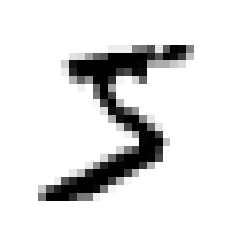

In [7]:
# plot 1 image as example

import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28) # reshape into 28 x 28 image

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [8]:
y[0]

&#39;5&#39;

In [9]:
# Train test split - firsr 60,000 rows are train, last 10,000 rows are test
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [20]:
X_train.shape

(60000, 784)

In [10]:
# Train random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier(random_state=42, verbose=1)

#param_grid = {'max_depth':[10,20,30,40],
#              'min_samples_leaf': [10, 30, 50, 70]
#              }
#search = RandomizedSearchCV(estimator = clf, param_distributions= param_grid, cv = 3 , n_iter = 50, n_jobs=-1, verbose = 1)




In [11]:
#search.fit(X_train, y_train)
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   38.9s finished


RandomForestClassifier(random_state=42, verbose=1)

In [12]:
predict = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [13]:
# get accuracy score for model
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predict)

0.9705

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

In [26]:
X_reduced = pca.fit_transform(X)

In [27]:
X_reduced.shape

(70000, 154)

In [28]:
X_train_red, y_train_red, X_test_red, y_test_red = X_reduced[:60000], y[:60000], X_reduced[60000:], y[60000:]

In [30]:
X_train_red.shape

(60000, 154)

In [31]:
clf2 = RandomForestClassifier(random_state=42, verbose=1)
clf2.fit(X_train_red, y_train_red)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomForestClassifier(random_state=42, verbose=1)

In [32]:
predict2 = clf2.predict(X_test_red)
accuracy_score(y_test_red, predict2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


0.9498